In [1]:
import torch
from matplotlib import pyplot as plt
from torch import nn

In [2]:
weight= 0.7
bias =  0.2

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

In [3]:
len(X)

50

In [4]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [6]:
def plot_pred(
        train_data=X_train,
        test_data=X_test,
        train_labels=y_train,
        test_labels=y_test,
        predictions=None,
):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b",s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g",s=4, label="test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r",s=4, label="predictions")
    plt.legend(prop={'size': 14})

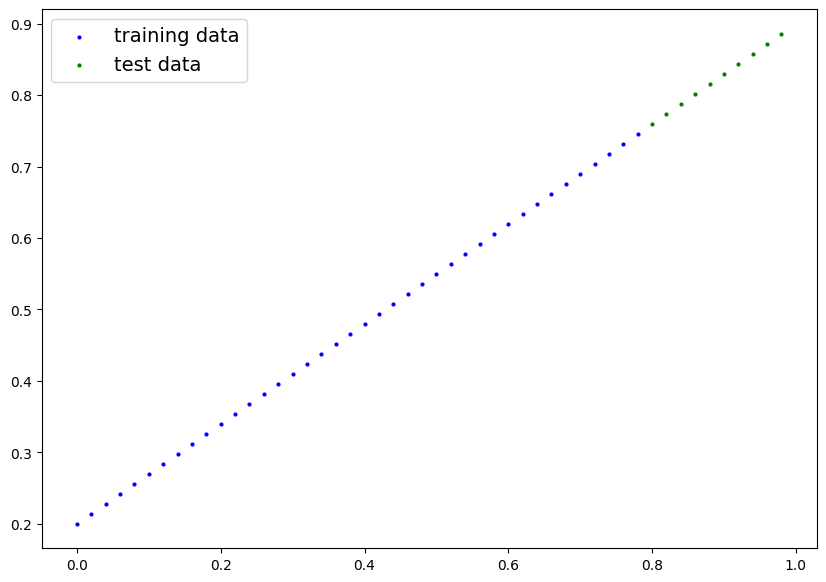

In [7]:
plot_pred()

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [10]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.7600],
         [0.7740],
         [0.7880],
         [0.8020],
         [0.8160],
         [0.8300],
         [0.8440],
         [0.8580],
         [0.8720],
         [0.8860]]))

In [12]:
with torch.inference_mode():
    y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

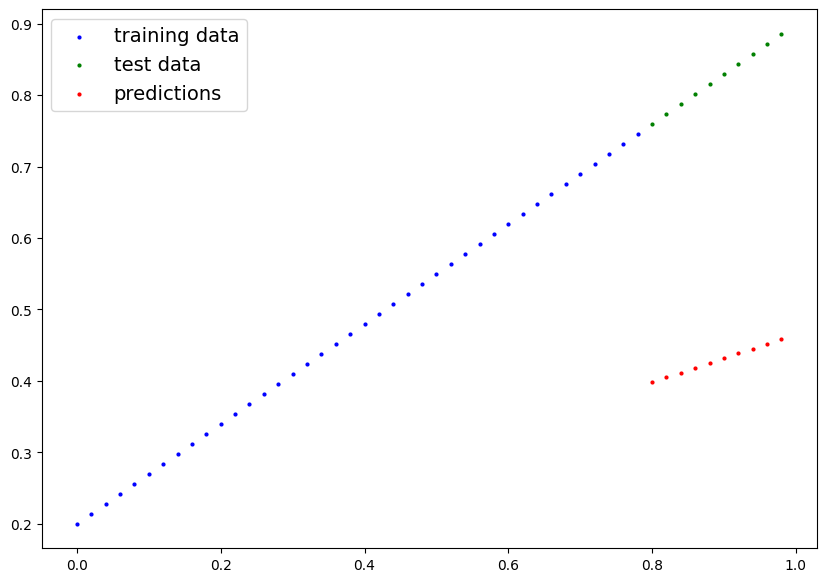

In [13]:
plot_pred(predictions=y_pred)

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.0001)

In [16]:
torch.manual_seed(42)
epochs = 20000

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    #forward pass
    y_pred = model_0(X_train)
    #clac loss
    loss = loss_fn(y_pred, y_train)
    # print(f"epoch: {epoch}, loss: {loss}")
    #optimizer
    optimizer.zero_grad()
    #backprop
    loss.backward()
    # print(f"loss: {loss}")
    #grad descent
    optimizer.step()

    #testing
    model_0.eval()

    y_pred = model_0(X_test)
    test_loss = loss_fn(y_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        # print("epoch: {}, test_loss: {}".format(epoch, test_loss))
        # print(model_0.state_dict())

In [17]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.7000])), ('bias', tensor([0.2001]))])

In [18]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

In [19]:
y_pred_new

tensor([[0.7601],
        [0.7741],
        [0.7881],
        [0.8021],
        [0.8161],
        [0.8301],
        [0.8441],
        [0.8580],
        [0.8720],
        [0.8860]])

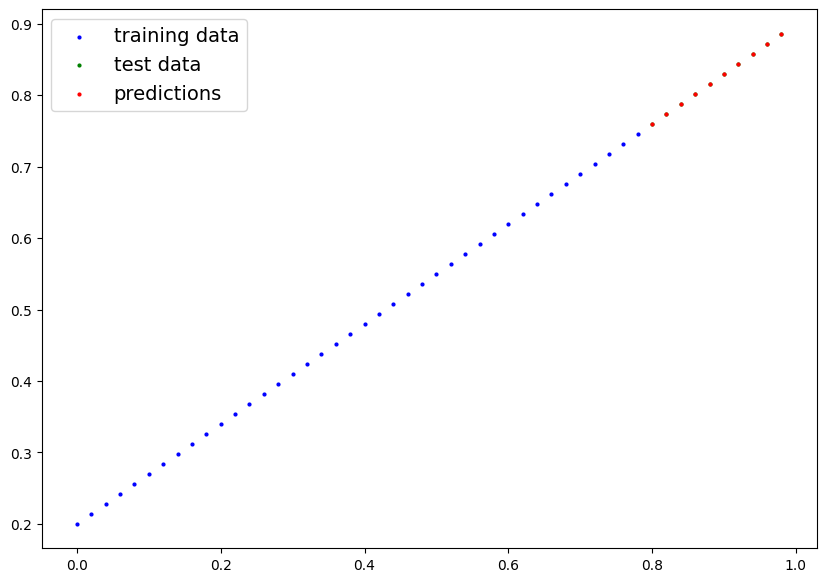

In [20]:
plot_pred(predictions=y_pred_new)

In [21]:
print(loss)

tensor(4.9549e-05, grad_fn=<MeanBackward0>)


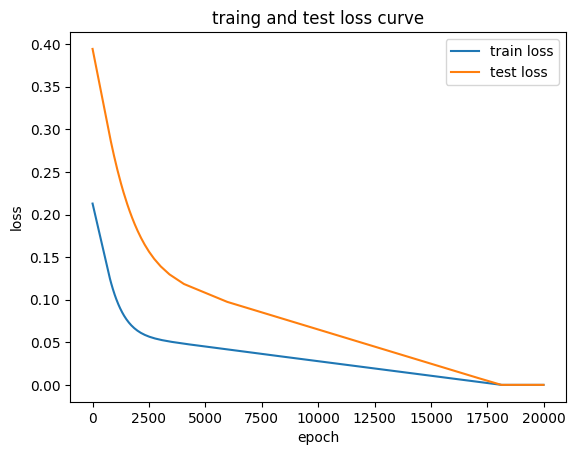

In [22]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label="train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="test loss")
plt.title("traing and test loss curve")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

In [23]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200,
  210,
  220,
  230,
  240,
  250,
  260,
  270,
  280,
  290,
  300,
  310,
  320,
  330,
  340,
  350,
  360,
  370,
  380,
  390,
  400,
  410,
  420,
  430,
  440,
  450,
  460,
  470,
  480,
  490,
  500,
  510,
  520,
  530,
  540,
  550,
  560,
  570,
  580,
  590,
  600,
  610,
  620,
  630,
  640,
  650,
  660,
  670,
  680,
  690,
  700,
  710,
  720,
  730,
  740,
  750,
  760,
  770,
  780,
  790,
  800,
  810,
  820,
  830,
  840,
  850,
  860,
  870,
  880,
  890,
  900,
  910,
  920,
  930,
  940,
  950,
  960,
  970,
  980,
  990,
  1000,
  1010,
  1020,
  1030,
  1040,
  1050,
  1060,
  1070,
  1080,
  1090,
  1100,
  1110,
  1120,
  1130,
  1140,
  1150,
  1160,
  1170,
  1180,
  1190,
  1200,
  1210,
  1220,
  1230,
  1240,
  1250,
  1260,
  1270,
  1280,
  1290,
  1300,
  1310,
  1320,
  1330,
  1340,
  1350,
  1360,
  1370,
  1380,

In [24]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.7000])), ('bias', tensor([0.2001]))])

In [25]:
torch.save(model_0.state_dict(), "model_0.pth")

In [26]:
load_model = LinearRegressionModel()

load_model.load_state_dict(torch.load("model_0.pth"))

<All keys matched successfully>

In [27]:
load_model.state_dict()

OrderedDict([('weight', tensor([0.7000])), ('bias', tensor([0.2001]))])

In [28]:
load_model.eval()
with torch.inference_mode():
    y_pred = model_0(X_test)


In [29]:
y_pred == load_model_preds

NameError: name 'load_model_preds' is not defined